In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [24]:
df_factorized = pd.read_csv('clas6/CLAS6_factorized.txt')
df_factorized.head()

,rc_type,xs_type,rs,x,z,Q,qT_Q,xs,xs_err
0,rc,unpol,3.25,0.3025,0.2,1.54,1.510700,0.000954,3.238968e-08
1,rc,unpol,3.25,0.3025,0.2,1.54,1.007133,0.002129,9.053538e-08
2,rc,unpol,3.25,0.3025,0.2,1.54,0.755350,0.002821,8.728114e-08
3,rc,unpol,3.25,0.3025,0.2,1.54,0.604280,0.003213,7.246642e-08
4,rc,unpol,3.25,0.3025,0.2,1.54,0.503567,0.003450,6.090756e-08


0.2 1.5107 born 36    0.000994
Name: xs, dtype: float64 rc 0    0.000954
Name: xs, dtype: float64
0.3 1.007133 born 43    0.000567
Name: xs, dtype: float64 rc 7    0.000533
Name: xs, dtype: float64
0.4 0.75535 born 50    0.000328
Name: xs, dtype: float64 rc 14    0.000304
Name: xs, dtype: float64
0.5 0.60428 born 57    0.000193
Name: xs, dtype: float64 rc 21    0.000176
Name: xs, dtype: float64
0.6 0.503567 born 64    0.000115
Name: xs, dtype: float64 rc 28    0.000103
Name: xs, dtype: float64
0.7 0.431629 born 71    0.000067
Name: xs, dtype: float64 rc 35    0.000058
Name: xs, dtype: float64


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_81932/1186678803.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs_born_factorized =  df_factorized[df_factorized['rc_type']=='born'][df_factorized['Q']==1.540000][df_factorized['z']==i_z][df_factorized['x']==0.302500][df_factorized['qT_Q']==qT_Q]['xs']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_81932/1186678803.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs_rc_factorized =  df_factorized[df_factorized['rc_type']=='rc'][df_factorized['Q']==1.540000][df_factorized['z']==i_z][df_factorized['x']==0.302500][df_factorized['qT_Q']==qT_Q]['xs']


Text(0.5, 0, 'z')

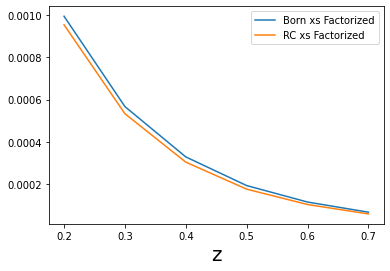

In [25]:
zs_factorized = df_factorized[df_factorized['Q']==1.540000][df_factorized['x']==0.302500]['z'].unique()
xs_born_factorizeds =[]
xs_rc_factorizeds=[]
for i_z in zs_factorized:
    qT_Q = round(0.30214/i_z,6)
    
    xs_born_factorized =  df_factorized[df_factorized['rc_type']=='born'][df_factorized['Q']==1.540000][df_factorized['z']==i_z][df_factorized['x']==0.302500][df_factorized['qT_Q']==qT_Q]['xs']
    xs_rc_factorized =  df_factorized[df_factorized['rc_type']=='rc'][df_factorized['Q']==1.540000][df_factorized['z']==i_z][df_factorized['x']==0.302500][df_factorized['qT_Q']==qT_Q]['xs']
    print(i_z,qT_Q,'born',xs_born_factorized,'rc',xs_rc_factorized)
    xs_born_factorizeds.append(xs_born_factorized)
    xs_rc_factorizeds.append(xs_rc_factorized)
plt.plot(zs_factorized,xs_born_factorizeds,'-',label='Born xs Factorized')
plt.plot(zs_factorized,xs_rc_factorizeds,'-',label='RC xs Factorized')
plt.legend()
plt.xlabel('z',fontsize=20)

In [26]:
df_traditional = pd.read_csv('clas6/out_clas6_born.txt',delim_whitespace=True,skiprows=[0])
df_traditional.head()



,z,yield
0,0.005,0.0
1,0.015,0.0
2,0.025,0.0
3,0.035,0.0
4,0.045,0.0


In [27]:
df_traditional_rc = pd.read_csv('clas6/out_clas6_rc.txt',delim_whitespace=True,skiprows=[0])
df_traditional_rc.head()

,z,yield
0,0.005,0.0
1,0.015,0.0
2,0.025,0.0
3,0.035,0.0
4,0.045,0.0


1.2397168327094004


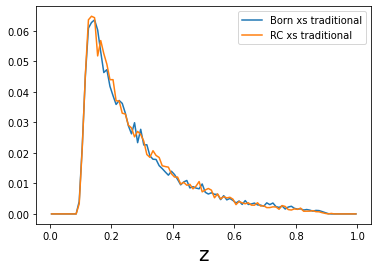

In [28]:

Factor_born_z = 1000/(2.56819*(2.66-2.23)*(0.32-0.28)*(0.2809-0.1681)*(-2.44+3.141592)*(0.4-0.36))
Factor_rc_z = Factor_born_z
#Factor = 5.1782e10/(2099*2*3.14)
#Factor = 1/5.1782e10
zs_traditional = df_traditional['z']
xs_born_traditional =  df_traditional['yield']

zs_rc_traditional = df_traditional_rc['z']
xs_rc_traditional =  df_traditional_rc['yield']

plt.plot(zs_traditional,np.asarray(xs_born_traditional)*Factor_born_z,'-',label='Born xs traditional')
plt.plot(zs_rc_traditional,np.asarray(xs_rc_traditional)*Factor_rc_z,'-',label='RC xs traditional')
plt.legend()
plt.xlabel('z',fontsize=20)
print(df_traditional_rc['yield'].sum()*Factor_rc_z)

#plt.plot(zs_factorized,xs_born_factorized,'-',label='Born xs Factorized')
#plt.plot(zs_factorized,xs_rc_factorized,'-',label='RC xs Factorized')




Text(0.5, 0, 'z')

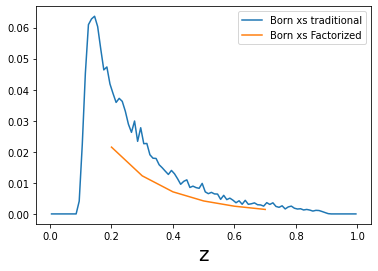

In [35]:
plt.plot(zs_traditional,np.asarray(xs_born_traditional)*Factor_born_z,'-',label='Born xs traditional')
plt.plot(zs_factorized,((1000)/(2.56819*18))*np.asarray(xs_born_factorizeds),'-',label='Born xs Factorized')

#plt.xlim(0.3,0.7)
#plt.ylim(0,0.001)
plt.legend()
plt.xlabel('z',fontsize=20)

In [ ]:
z = np.linspace(0.1,0.7,7)
print(z)
qT_Q = 0.30214/z
print(qT_Q)

In [94]:
x = np.linspace(0,1,26)
print(x)

[0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.  ]


In [100]:
clas6_data = pd.read_csv('clas6/CLAS6.txt', delim_whitespace=True)
print(clas6_data['x'].unique())
print(len(clas6_data['x'].unique()))



[0.1468 0.1753 0.2051 0.2362 0.2686 0.3025 0.3379 0.3748 0.4134 0.4537
 0.4958 0.5397 0.5855 0.6334 0.6834 0.7355 0.79   0.8469 0.9063]
19


In [104]:
xs = clas6_data['x'].unique()
x_old = 0
for i_x in xs:
    print(i_x,' diff ',round(i_x-x_old,5))
    x_old=i_x

0.1468  diff  0.1468
0.1753  diff  0.0285
0.2051  diff  0.0298
0.2362  diff  0.0311
0.2686  diff  0.0324
0.3025  diff  0.0339
0.3379  diff  0.0354
0.3748  diff  0.0369
0.4134  diff  0.0386
0.4537  diff  0.0403
0.4958  diff  0.0421
0.5397  diff  0.0439
0.5855  diff  0.0458
0.6334  diff  0.0479
0.6834  diff  0.05
0.7355  diff  0.0521
0.79  diff  0.0545
0.8469  diff  0.0569
0.9063  diff  0.0594


In [103]:
xs = clas6_data['z'].unique()
x_old = 0
for i_x in xs:
    print(i_x,' diff ',i_x-x_old)
    x_old=i_x

0.0682  diff  0.0682
0.0933  diff  0.025099999999999997
0.1194  diff  0.026100000000000012
0.1468  diff  0.027400000000000008
0.1753  diff  0.028499999999999998
0.2051  diff  0.029799999999999993
0.2362  diff  0.03109999999999999
0.2686  diff  0.03240000000000001
0.3025  diff  0.033899999999999986
0.3379  diff  0.03539999999999999
0.3748  diff  0.036900000000000044
0.4134  diff  0.03859999999999997
0.4537  diff  0.0403
0.4958  diff  0.042100000000000026
0.5397  diff  0.04389999999999994
0.5855  diff  0.04580000000000006
0.6334  diff  0.04789999999999994
0.6834  diff  0.050000000000000044
0.7355  diff  0.052100000000000035
0.79  diff  0.05449999999999999
0.8469  diff  0.05689999999999995
0.9063  diff  0.05940000000000001


In [105]:
xs = clas6_data['z'].unique()
print(xs)

[0.0682 0.0933 0.1194 0.1468 0.1753 0.2051 0.2362 0.2686 0.3025 0.3379
 0.3748 0.4134 0.4537 0.4958 0.5397 0.5855 0.6334 0.6834 0.7355 0.79
 0.8469 0.9063]


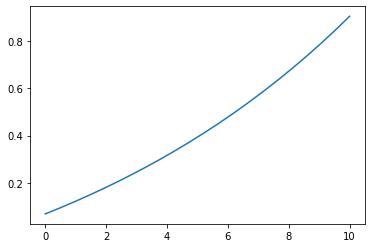

In [110]:
clas6_data['z'].unique()
z_axis = np.linspace(0,10,22)
plt.plot(z_axis,(clas6_data['z'].unique()))

In [69]:
clas6_data['pT2'].unique()

array([0.0049, 0.0259, 0.0655, 0.129 , 0.2165, 0.3402, 0.5074, 0.7427,
       1.0741, 1.554 ])